In [6]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import joblib


In [8]:
# Load dataset
df = pd.read_csv("/home/intellect/Documents/Naive_Bayes/titanic.csv")
df.head()

,passenger_id,name,p_class,sex,age,sib_sp,parch,ticket,fare,cabin,embarked,survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,NaN,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [9]:
df.isnull().sum()

passenger_id      0
name              0
p_class           0
sex               0
age             177
sib_sp            0
parch             0
ticket            0
fare              9
cabin           687
embarked          2
survived          0
dtype: int64

In [10]:
df = df.drop(columns=[
    'passenger_id',
    'name',
    'sib_sp',
    'parch',
    'ticket',
    'cabin',
    'embarked'
])

df.head()


,p_class,sex,age,fare,survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,NaN,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [11]:
# Fill missing age with median
df['age'].fillna(df['age'].median(), inplace=True)

# Fill missing fare with median
df['fare'].fillna(df['fare'].median(), inplace=True)


/tmp/ipykernel_281523/2714068292.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
/tmp/ipykernel_281523/2714068292.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [12]:
# Convert sex column to numeric
df['sex'] = df['sex'].map({'male': 0, 'female': 1})


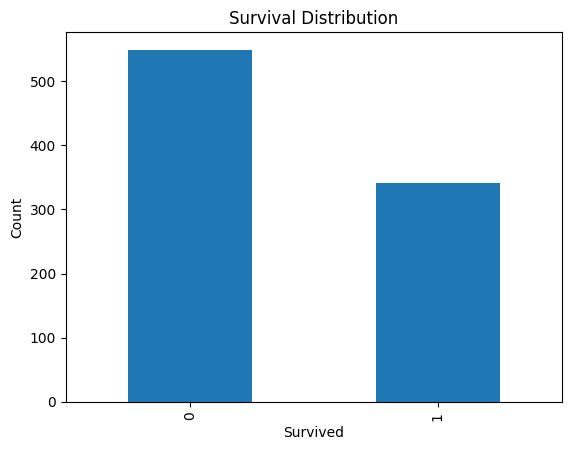

In [13]:
df['survived'].value_counts().plot(
    kind='bar',
    title='Survival Distribution',
    xlabel='Survived',
    ylabel='Count'
)
plt.show()


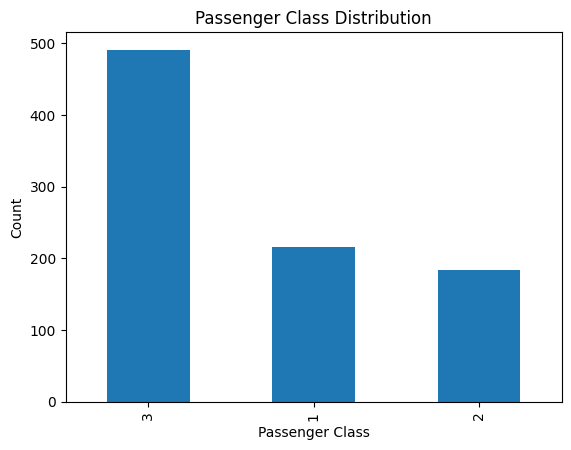

In [14]:
df['p_class'].value_counts().plot(
    kind='bar',
    title='Passenger Class Distribution',
    xlabel='Passenger Class',
    ylabel='Count'
)
plt.show()


In [15]:
X = df.drop('survived', axis=1)
y = df['survived']


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [17]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)


,"priors priors: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None
,"var_smoothing var_smoothing: float, default=1e-9Portion of the largest variance of all features that is added tovariances for calculation stability... versionadded:: 0.20",1e-09


In [18]:
y_pred = gnb.predict(X_test)


In [19]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.79      0.79       105
           1       0.71      0.72      0.71        74

    accuracy                           0.76       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.76      0.76       179



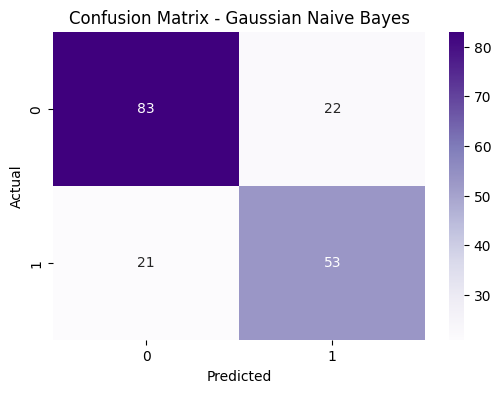

In [20]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Gaussian Naive Bayes")
plt.show()


In [21]:
# Save trained model
joblib.dump(gnb, "titanic_gnb_model.pkl")

print("Model saved successfully as titanic_gnb_model.pkl")


Model saved successfully as titanic_gnb_model.pkl


In [22]:
joblib.dump(X.columns.tolist(), "titanic_features.pkl")


['titanic_features.pkl']

In [23]:
# Load model
loaded_model = joblib.load("titanic_gnb_model.pkl")

# Test prediction
sample_prediction = loaded_model.predict(X_test[:1])
print("Sample Prediction:", sample_prediction)


Sample Prediction: [0]
